In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

In [2]:
df_train = pd.read_csv(r'/content/drive/MyDrive/Kaggle/StoreSales/train.csv')
df_test = pd.read_csv(r'/content/drive/MyDrive/Kaggle/StoreSales/test.csv')
df_holidays = pd.read_csv(r'/content/drive/MyDrive/Kaggle/StoreSales/holidays_events.csv')
df_oil = pd.read_csv(r'/content/drive/MyDrive/Kaggle/StoreSales/oil.csv')
df_stores = pd.read_csv(r'/content/drive/MyDrive/Kaggle/StoreSales/stores.csv')
df_transaction = pd.read_csv(r'/content/drive/MyDrive/Kaggle/StoreSales/transactions.csv')
# note date from the training set is 2013-01-01 to 2017-08-15, date range from the test set is 2017-08-16 to 2017-08-31
# however the date from transaction ends on 2017-08-15, there is no transaction data for the test set, so ignore transaction

In [3]:
n_train = len(df_train)
n_test = len(df_test)
y_train = df_train['sales']

# Merge all the data into one dataset

In [4]:
all_data = pd.concat([df_train,df_test],axis=0)
all_data.drop('id',axis=1,inplace=True)
all_data.reset_index(inplace=True,drop=True)

In [5]:
# Note, there are duplicates in date in df_holiday
# For simplicity, just drop the dulplicates
df_holidays = df_holidays.drop_duplicates(subset='date',keep='first')

In [6]:
all_data = pd.merge(left=all_data,right=df_holidays,how='left',left_on='date',right_on='date')
all_data = pd.merge(left=all_data,right=df_oil,how='left',left_on='date',right_on='date')
all_data = pd.merge(left=all_data,right=df_stores,how='left',left_on='store_nbr',right_on='store_nbr')
all_data

,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,dcoilwtico,city,state,type_y,cluster
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029395,2017-08-31,9,POULTRY,NaN,1,NaN,NaN,NaN,NaN,NaN,47.26,Quito,Pichincha,B,6
3029396,2017-08-31,9,PREPARED FOODS,NaN,0,NaN,NaN,NaN,NaN,NaN,47.26,Quito,Pichincha,B,6
3029397,2017-08-31,9,PRODUCE,NaN,1,NaN,NaN,NaN,NaN,NaN,47.26,Quito,Pichincha,B,6
3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,NaN,NaN,NaN,NaN,NaN,47.26,Quito,Pichincha,B,6


In [7]:
df_train = all_data[:n_train]
df_test = all_data[n_train:]

# EDA

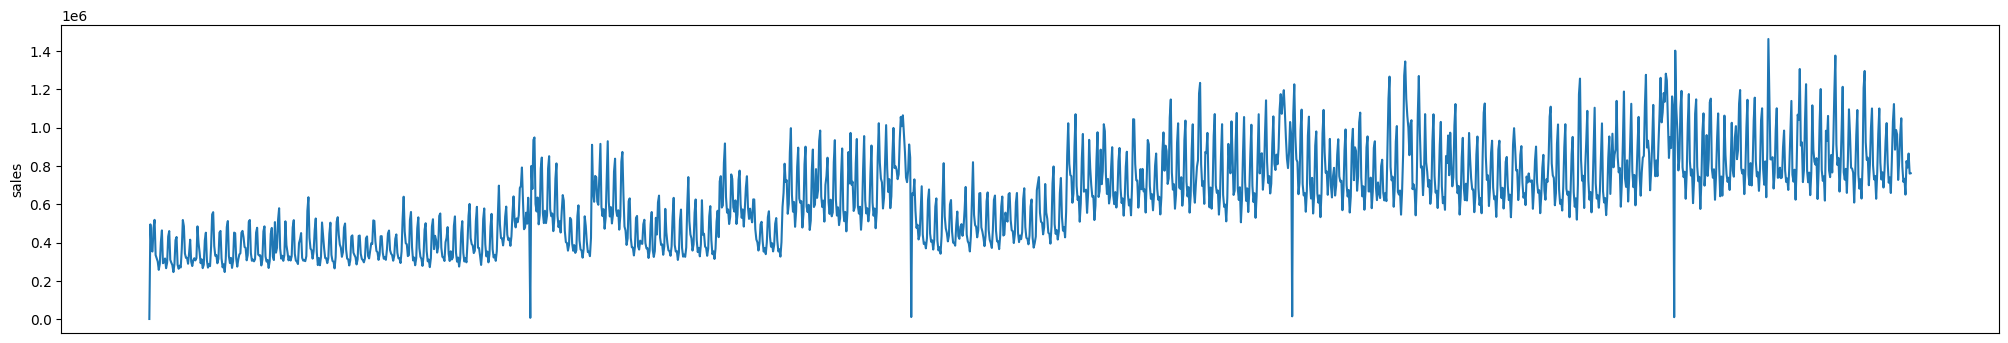

In [8]:
sales_date = df_train.groupby(by='date').sum(numeric_only=True)['sales']
plt.figure(figsize=(25,4))
sns.lineplot(x=df_train['date'].unique(),y=sales_date)
plt.xticks([])
plt.show()
# There clearly is seasonality and trend

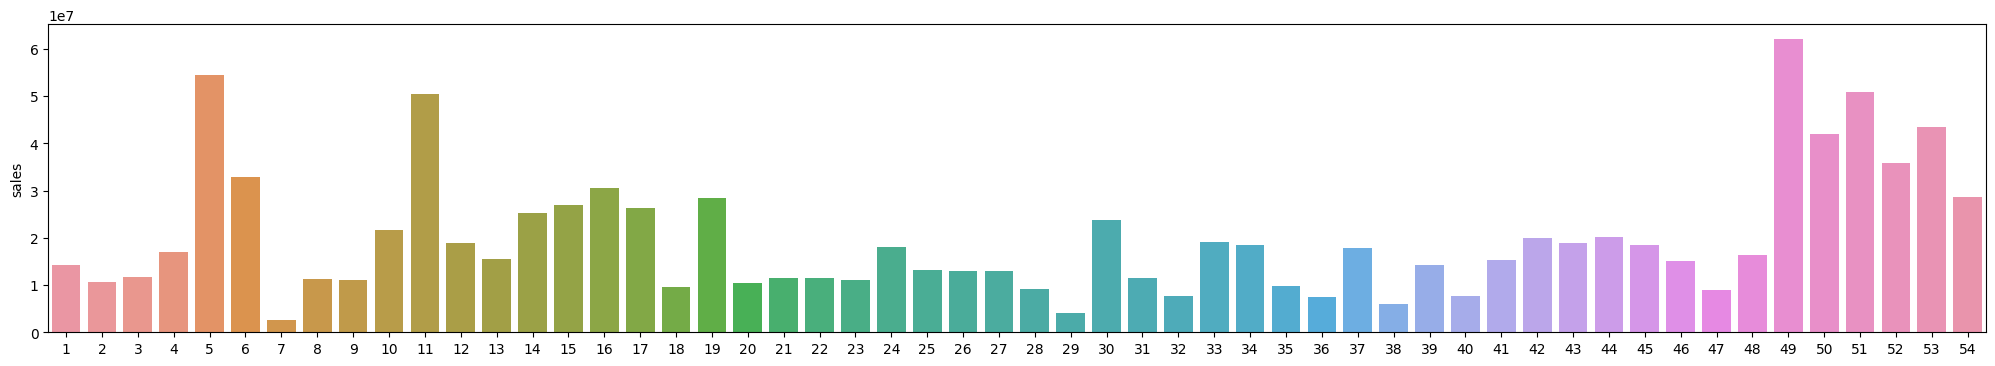

In [9]:
sales_store = df_train.groupby(by='store_nbr').sum(numeric_only=True)['sales']
plt.figure(figsize=(25,4))
sns.barplot(x=df_train['store_nbr'].unique(),y=sales_store)
plt.show()
# Clearly store_nbr has a significant influence on sales

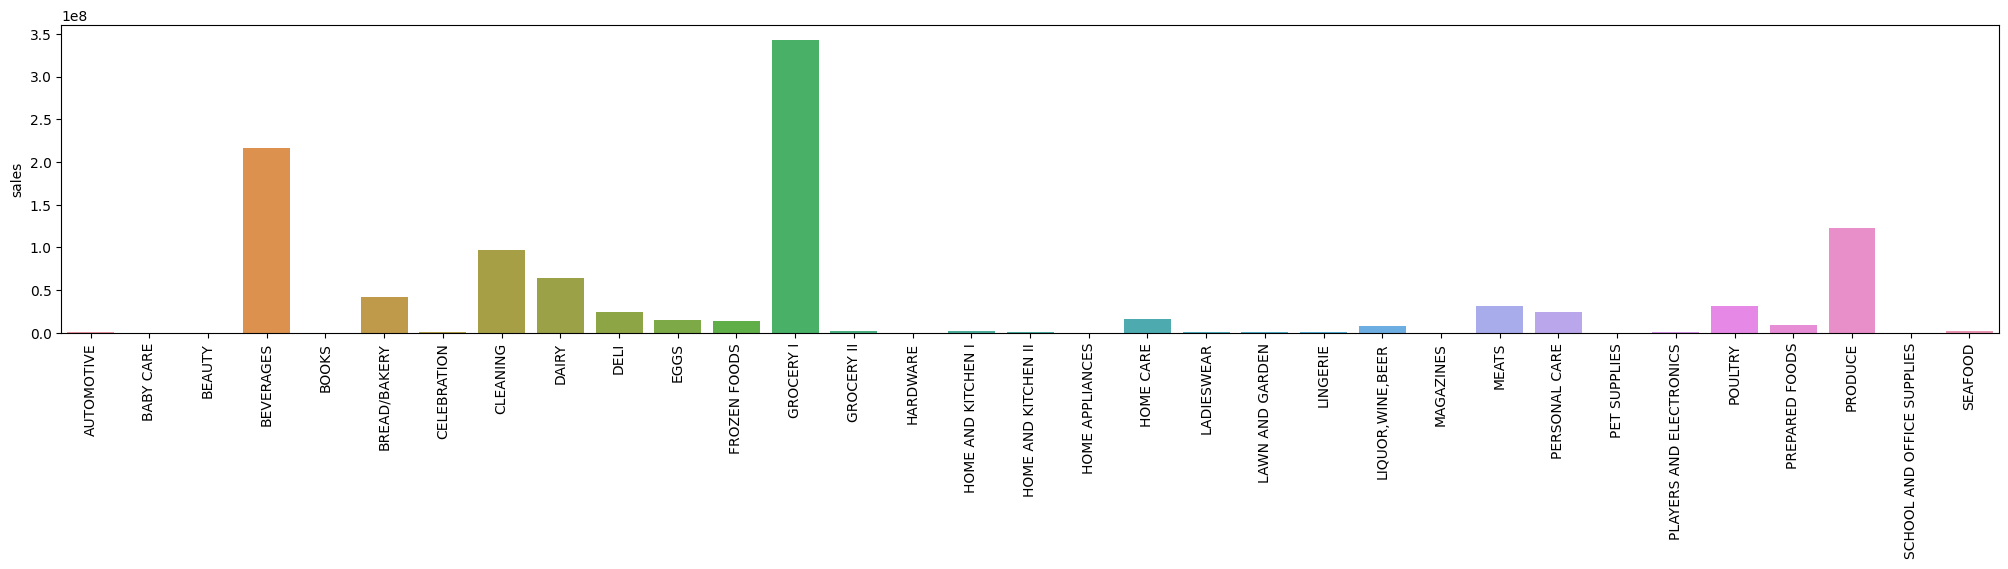

In [10]:
sales_family = df_train.groupby(by='family').sum(numeric_only=True)['sales']
plt.figure(figsize=(25,4))
sns.barplot(x=df_train['family'].unique(),y=sales_family)
plt.xticks(rotation=90)
plt.show()
# Clearly family has a significant influence on sales

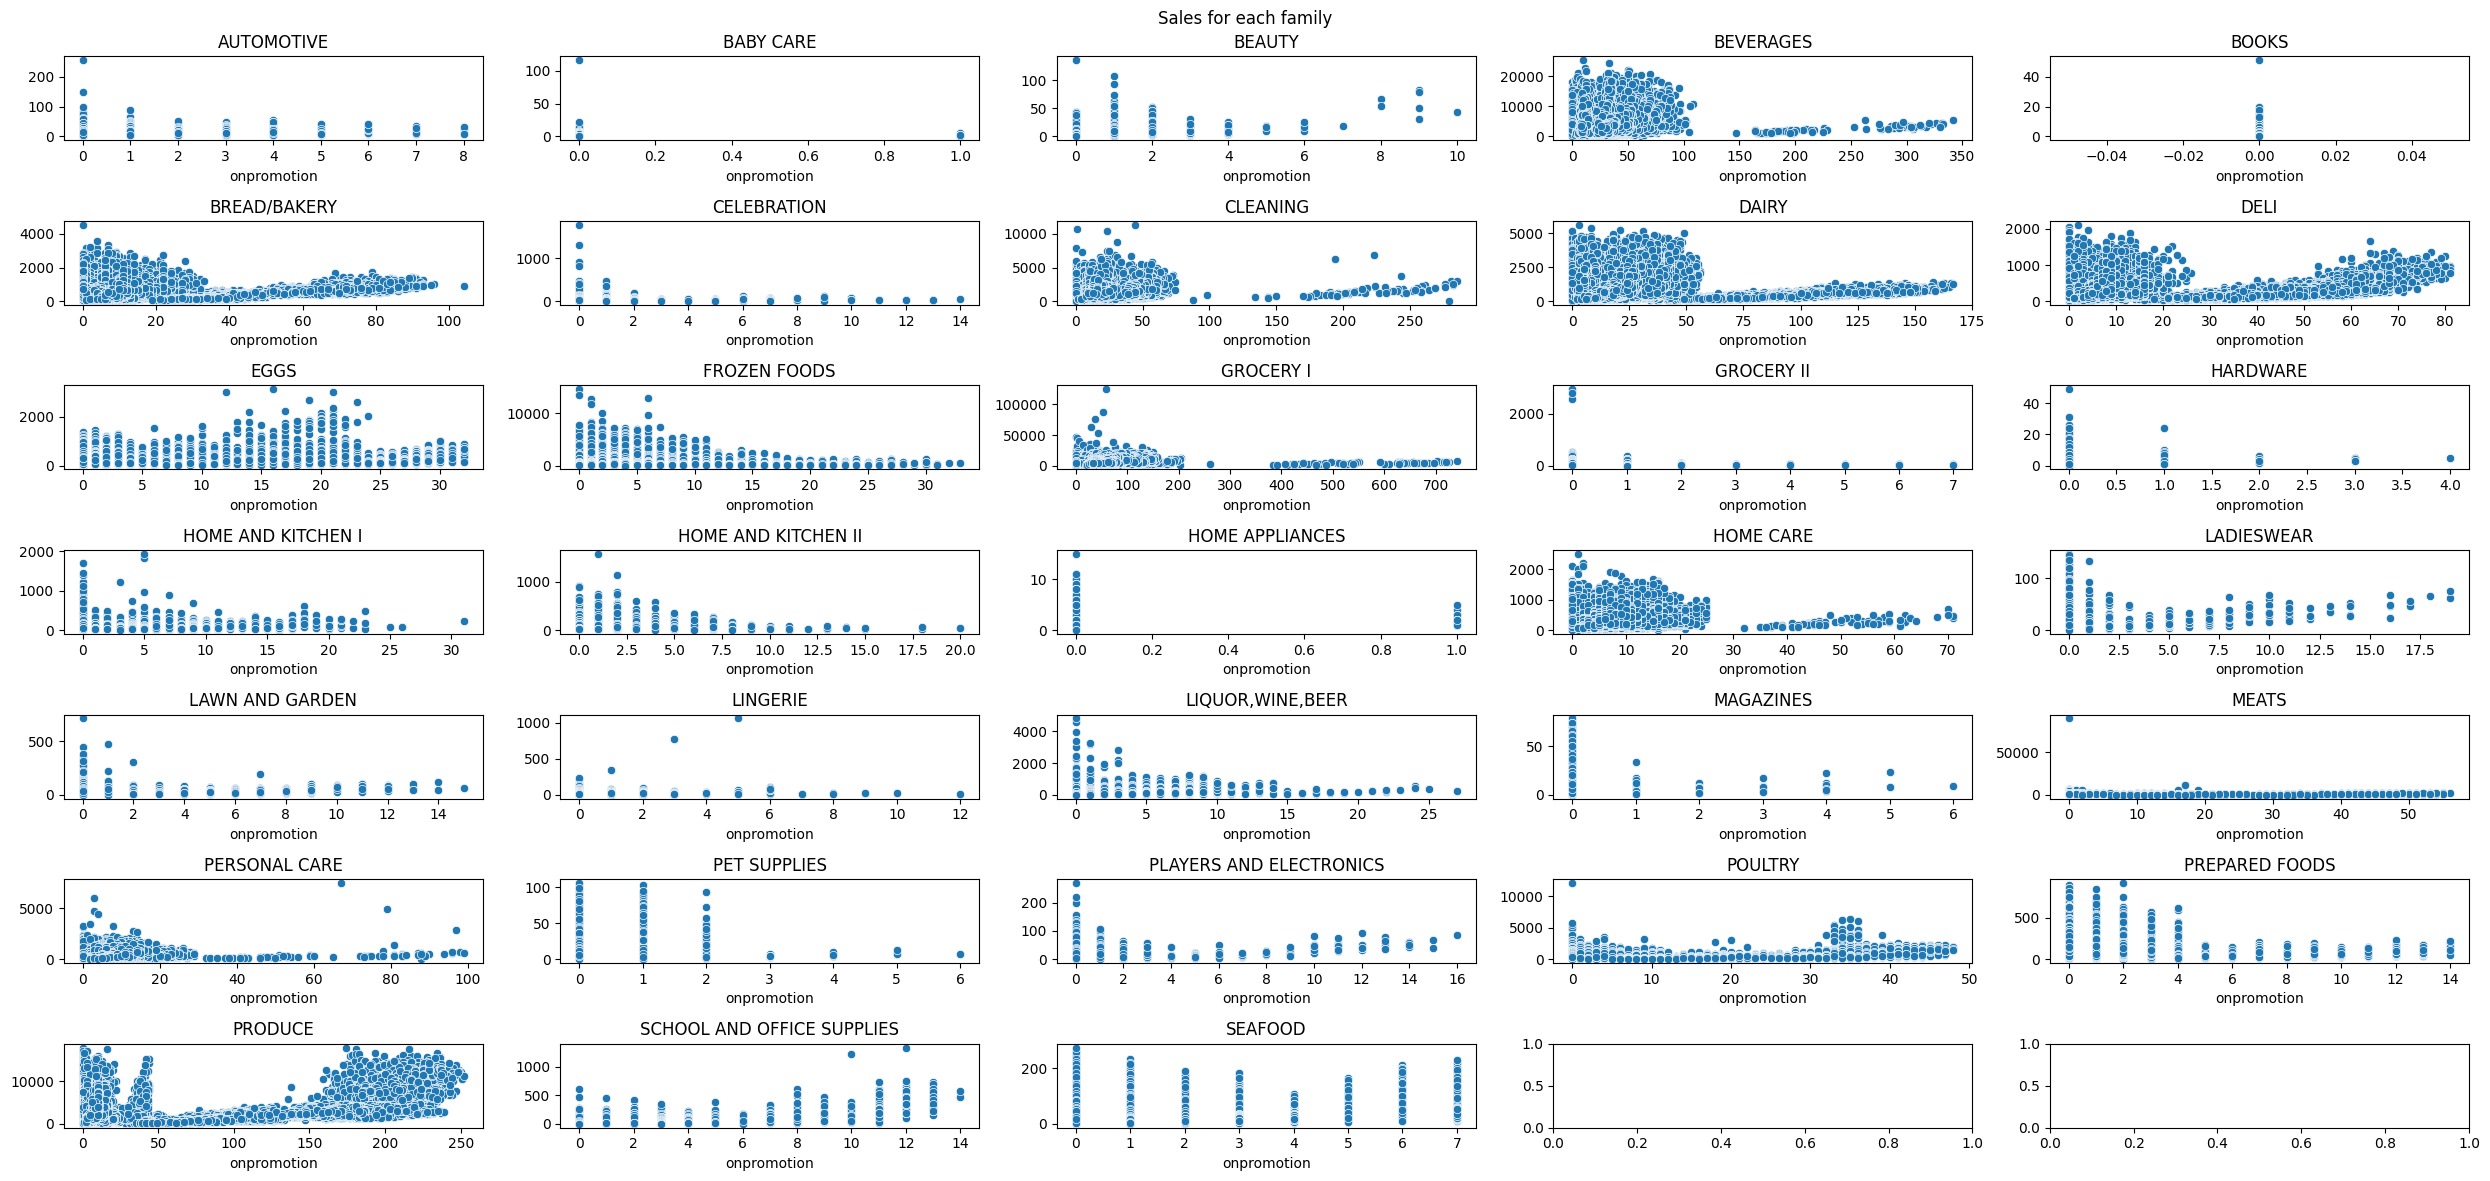

In [11]:
# onpromotion gives the total number of items in a product family that were being promoted at a store at a given date
# so draw the scatter plots of onpromotion and sales based on each family
families = df_train['family'].unique()
fig,axes = plt.subplots(7,5,figsize=(25,12))
fig.suptitle('Sales for each family')
for i,fam in enumerate(families):
  xx = i // 5
  yy = i % 5
  plt.subplots_adjust(wspace=1,hspace=0.5)
  subdata = df_train[df_train['family']==fam]
  sns.scatterplot(ax=axes[xx][yy],data=subdata,x='onpromotion',y='sales')
  axes[xx][yy].set_title(fam)
  axes[xx][yy].set_ylabel('')
plt.tight_layout()
plt.show()

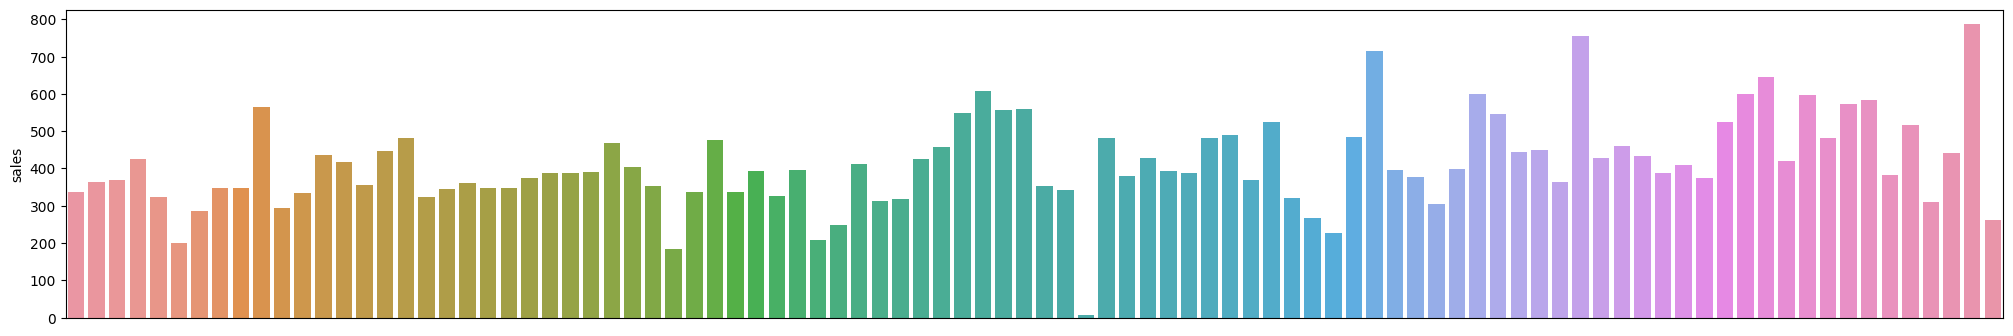

In [12]:
# nan values in type_x, locale, locale_name, description and transferred simply mean it's not a holiday
# so we can just fill in the nan value now
df_train[['type_x','locale','locale_name','description','transferred']] = df_train[['type_x','locale','locale_name','description','transferred']].fillna('Not a holiday')
df_test[['type_x','locale','locale_name','description','transferred']] = df_test[['type_x','locale','locale_name','description','transferred']].fillna('Not a holiday')
plt.figure(figsize=(25,4))
sales_holiday = df_train.groupby(by=['description']).mean(numeric_only=True)['sales'] # there are much more not-a-holiday date than holidays, so it's better to use mean instead of sum here
sns.barplot(x=df_train['description'].unique(),y=sales_holiday)
plt.xticks([])
plt.show()
# Clearly holidays have some influence on sales

0.30938242280285033 0.25
correlation between sales and oil:-0.07905016021992889


<Axes: xlabel='dcoilwtico', ylabel='sales'>

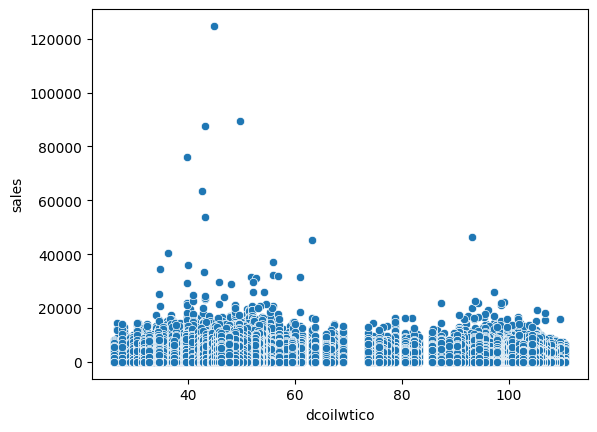

In [13]:
print(df_train['dcoilwtico'].isnull().sum()/len(df_train),df_test['dcoilwtico'].isnull().sum()/len(df_test))
print('correlation between sales and oil:{}'.format(df_train[['dcoilwtico','sales']].corr().iloc[0,1]))
sns.scatterplot(data=df_train,x='dcoilwtico',y='sales')
# It seems that oil does not have a significant influence on sales.
# However, it's mentioned in the data description that Ecuador is an oil-dependent country and it's economical health is highly vulnerable to shocks in oil prices.

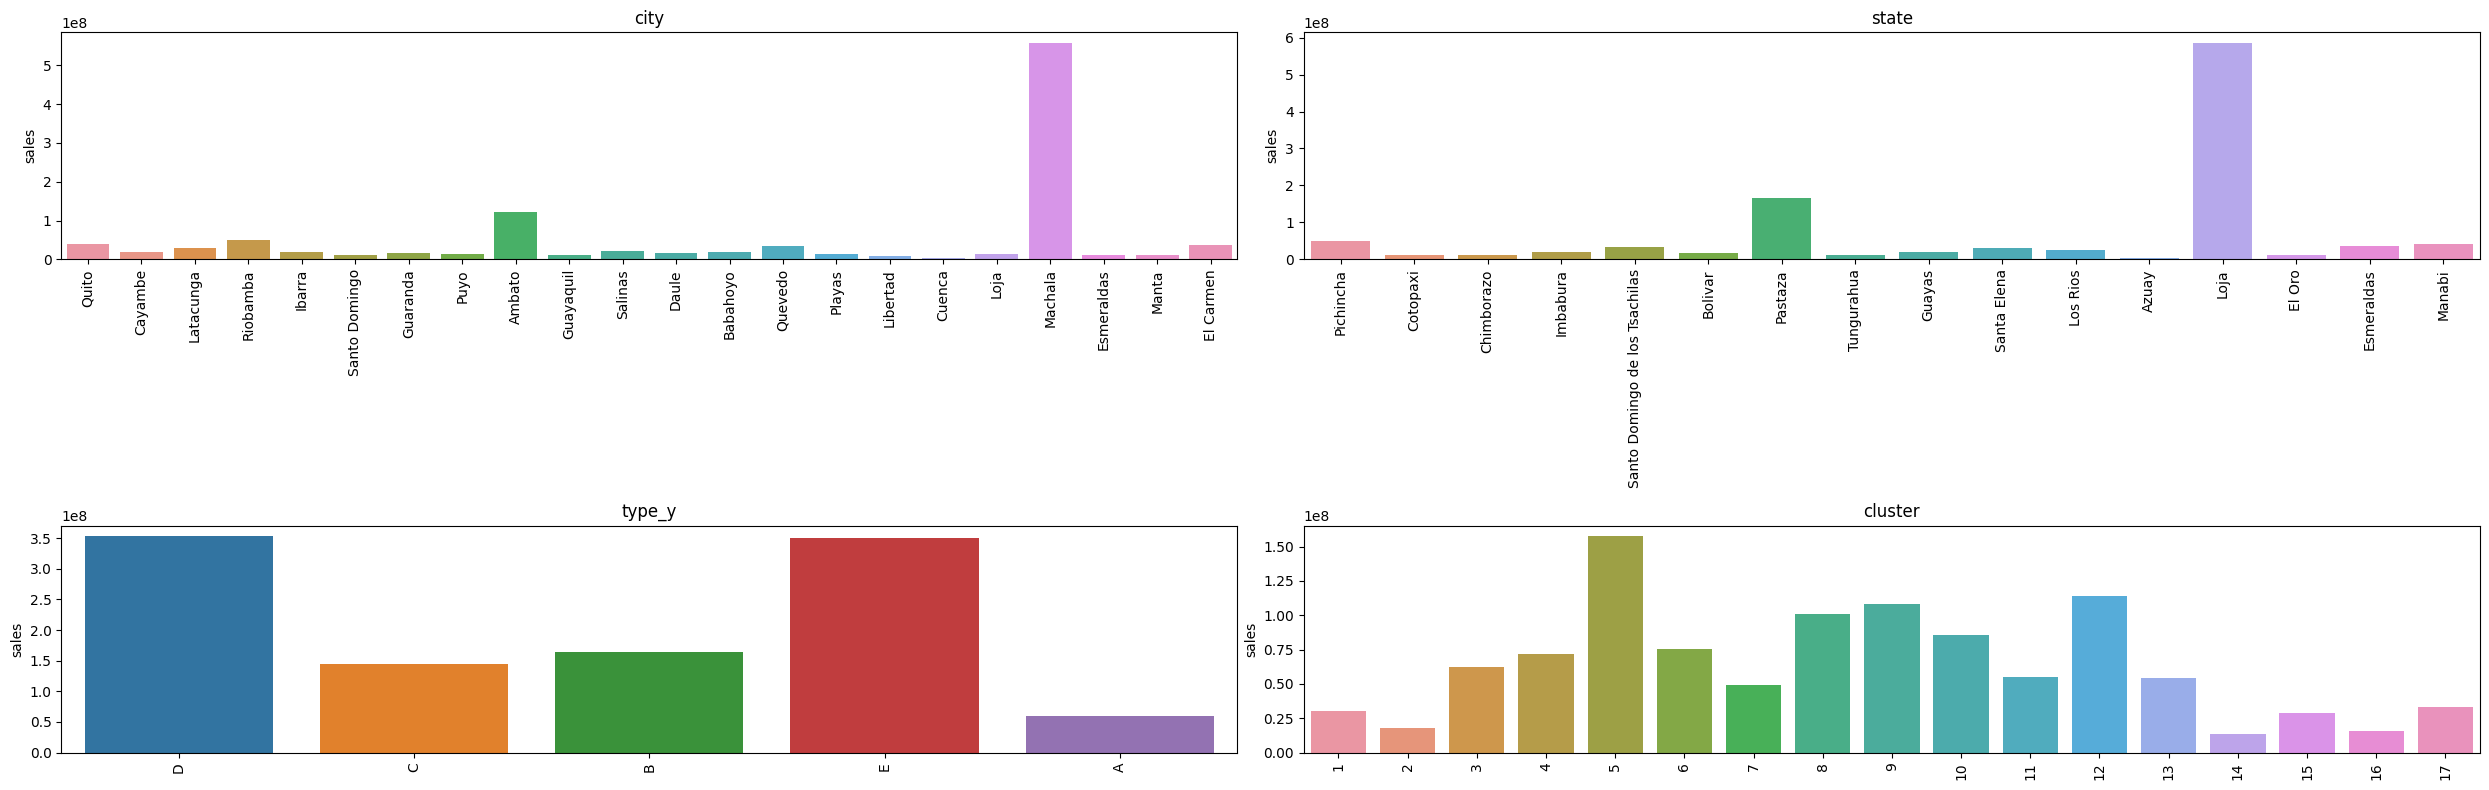

In [14]:
sales_city = df_train.groupby(by='city').sum(numeric_only=True)['sales']
sales_state = df_train.groupby(by='state').sum(numeric_only=True)['sales']
sales_type_y = df_train.groupby(by='type_y').sum(numeric_only=True)['sales']
sales_cluster = df_train.groupby(by='cluster').sum(numeric_only=True)['sales']
fig,axes = plt.subplots(2,2,figsize=(25,8))
sns.barplot(x=df_train['city'].unique(),y=sales_city,ax=axes[0][0])
axes[0][0].set_xticklabels(axes[0][0].get_xticklabels(),rotation=90)
axes[0][0].set_title('city')
sns.barplot(x=df_train['state'].unique(),y=sales_state,ax=axes[0][1])
axes[0][1].set_xticklabels(axes[0][1].get_xticklabels(),rotation=90)
axes[0][1].set_title('state')
sns.barplot(x=df_train['type_y'].unique(),y=sales_type_y,ax=axes[1][0])
axes[1][0].set_xticklabels(axes[1][0].get_xticklabels(),rotation=90)
axes[1][0].set_title('type_y')
sns.barplot(x=df_train['cluster'].unique(),y=sales_cluster,ax=axes[1][1])
axes[1][1].set_xticklabels(axes[1][1].get_xticklabels(),rotation=90)
axes[1][1].set_title('cluster')
plt.tight_layout()
plt.show()

# Missing values

In [15]:
all_data.drop('sales',inplace=True,axis=1,errors='ignore')
missing_values = pd.DataFrame(all_data.isnull().sum(),columns=['Missing']).sort_values(by='Missing',ascending=False)
missing_values[missing_values['Missing']>0]

,Missing
type_x,2578554
locale,2578554
locale_name,2578554
description,2578554
transferred,2578554
dcoilwtico,935550


In [16]:
# For type_x, locale, locale_name, description and transferred, we already know the missing value is not-a-holiday
# For dcoilwtico, we decide to drop it
all_data[['type_x','locale','locale_name','description','transferred']] = all_data[['type_x','locale','locale_name','description','transferred']].fillna('Not a holiday')
all_data.drop('dcoilwtico',axis=1,inplace=True,errors='ignore')
all_data

,date,store_nbr,family,onpromotion,type_x,locale,locale_name,description,transferred,city,state,type_y,cluster
0,2013-01-01,1,AUTOMOTIVE,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
1,2013-01-01,1,BABY CARE,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
2,2013-01-01,1,BEAUTY,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
3,2013-01-01,1,BEVERAGES,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
4,2013-01-01,1,BOOKS,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029395,2017-08-31,9,POULTRY,1,Not a holiday,Not a holiday,Not a holiday,Not a holiday,Not a holiday,Quito,Pichincha,B,6
3029396,2017-08-31,9,PREPARED FOODS,0,Not a holiday,Not a holiday,Not a holiday,Not a holiday,Not a holiday,Quito,Pichincha,B,6
3029397,2017-08-31,9,PRODUCE,1,Not a holiday,Not a holiday,Not a holiday,Not a holiday,Not a holiday,Quito,Pichincha,B,6
3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9,Not a holiday,Not a holiday,Not a holiday,Not a holiday,Not a holiday,Quito,Pichincha,B,6


# Feature Engineering

In [17]:
# Create three new features: year, month, day, week, weekday
all_data['date'] = pd.to_datetime(all_data['date'])
all_data['year'] = all_data['date'].dt.year.astype(str)
all_data['month'] = all_data['date'].dt.month.astype(str)
all_data['day'] = all_data['date'].dt.day.astype(str)
all_data['week'] = all_data['date'].dt.week.astype(str)
all_data['weekday'] = all_data['date'].dt.weekday.astype(str)
all_data.drop('date',inplace=True,axis=1,errors='ignore')
all_data

,store_nbr,family,onpromotion,type_x,locale,locale_name,description,transferred,city,state,type_y,cluster,year,month,day,week,weekday
0,1,AUTOMOTIVE,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,2013,1,1,1,1
1,1,BABY CARE,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,2013,1,1,1,1
2,1,BEAUTY,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,2013,1,1,1,1
3,1,BEVERAGES,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,2013,1,1,1,1
4,1,BOOKS,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,2013,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029395,9,POULTRY,1,Not a holiday,Not a holiday,Not a holiday,Not a holiday,Not a holiday,Quito,Pichincha,B,6,2017,8,31,35,3
3029396,9,PREPARED FOODS,0,Not a holiday,Not a holiday,Not a holiday,Not a holiday,Not a holiday,Quito,Pichincha,B,6,2017,8,31,35,3
3029397,9,PRODUCE,1,Not a holiday,Not a holiday,Not a holiday,Not a holiday,Not a holiday,Quito,Pichincha,B,6,2017,8,31,35,3
3029398,9,SCHOOL AND OFFICE SUPPLIES,9,Not a holiday,Not a holiday,Not a holiday,Not a holiday,Not a holiday,Quito,Pichincha,B,6,2017,8,31,35,3


In [18]:
# Convert numerical features which are really categorical: store_nbr, cluster
all_data['store_nbr'] = all_data['store_nbr'].astype(str)
all_data['cluster'] = all_data['cluster'].astype(str)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3029400 entries, 0 to 3029399
Data columns (total 17 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   store_nbr    object
 1   family       object
 2   onpromotion  int64 
 3   type_x       object
 4   locale       object
 5   locale_name  object
 6   description  object
 7   transferred  object
 8   city         object
 9   state        object
 10  type_y       object
 11  cluster      object
 12  year         object
 13  month        object
 14  day          object
 15  week         object
 16  weekday      object
dtypes: int64(1), object(16)
memory usage: 416.0+ MB


# Model
Since most of the features are categorical, catboost seems to be a good choice

In [19]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.2 MB/s eta 0:00:00


In [20]:
from catboost import CatBoostRegressor,Pool
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import mean_squared_log_error

In [21]:
train_features = all_data[:n_train]
test_features = all_data[n_train:]
train_target = y_train
Xtrain,Xval,ytrain,yval = train_test_split(train_features,train_target,test_size=0.3,shuffle=True)

In [22]:
categorical_features = all_data.loc[:,all_data.dtypes=='object'].columns
numerical_features = all_data.loc[:,all_data.dtypes!='object'].columns
categorical_features,numerical_features

(Index(['store_nbr', 'family', 'type_x', 'locale', 'locale_name', 'description',
        'transferred', 'city', 'state', 'type_y', 'cluster', 'year', 'month',
        'day', 'week', 'weekday'],
       dtype='object'),
 Index(['onpromotion'], dtype='object'))

In [23]:
def RMSLE(model,X,y):
  kf = KFold(n_splits=5,shuffle=True)
  rmsle = -np.sqrt(cross_val_score(model,X,y,cv=kf,scoring='neg_mean_squared_log_error'))
  return rmsle

In [24]:
# train_pooled = Pool(data=Xtrain,label=ytrain,cat_features=categorical_features.values)
# cbr = CatBoostRegressor(iterations=3000,depth=6,learning_rate=0.08,task_type='GPU',devices='0').fit(train_pooled)
# y_pred_train = cbr.predict(Xtrain)
# y_pred_val = cbr.predict(Xval)
# y_pred_train[y_pred_train<0] = 0
# y_pred_val[y_pred_val<0] = 0
# train_score = np.sqrt(mean_squared_log_error(ytrain,y_pred_train))
# val_score = np.sqrt(mean_squared_log_error(yval,y_pred_val))
# train_score,val_score

In [25]:
# id is used to reconstruct the whole dataset
train = pd.concat([train_features,train_target],axis=1)
train['id'] = np.array(range(len(train)))

test = test_features
test['id'] = np.array(range(len(test)))

df_train_dict = {}
df_val_dict = {}
df_test_dict = {}

id_train_dict = {}
id_val_dict = {}
id_test_dict = {}

df_ytrain_dict = {}
df_yval_dict = {}

for fam in train['family'].unique():

  # train val split
  temp = train[train['family']==fam]
  features = np.delete(temp.columns.values,temp.columns.values=='sales')
  Xtrain,Xval,ytrain,yval = train_test_split(temp[features],temp['sales'],test_size=0.3,shuffle=True)
  df_ytrain_dict[fam] = ytrain
  df_yval_dict[fam] = yval

  id_train_dict[fam] = Xtrain[Xtrain['family']==fam]['id']
  Xtrain.drop('family',axis=1,inplace=True)
  Xtrain.drop('id',axis=1,inplace=True)
  df_train_dict[fam] = Pool(data=Xtrain,label=ytrain,cat_features=np.delete(categorical_features.values,categorical_features.values=='family'))

  id_val_dict[fam] = Xval[Xval['family']==fam]['id']
  Xval.drop('family',axis=1,inplace=True)
  Xval.drop('id',axis=1,inplace=True)
  df_val_dict[fam] = Pool(data=Xval,label=yval,cat_features=np.delete(categorical_features.values,categorical_features.values=='family'))

  id_test_dict[fam] = test[test['family']==fam]['id']
  df_test_dict[fam] = test[test['family']==fam]
  df_test_dict[fam].drop('family',axis=1,inplace=True)
  df_test_dict[fam].drop('id',axis=1,inplace=True)
  df_test_dict[fam] = Pool(data=df_test_dict[fam],cat_features=np.delete(categorical_features.values,categorical_features.values=='family'))

In [26]:
def reconstruct(pred_dict:dict,id_dict):
  df = pd.DataFrame({'id':[],'sales':[]})
  for fam in train['family'].unique():
    temp = pd.DataFrame({'id':id_dict[fam],'sales':pred_dict[fam]})
    df = pd.concat([df,temp],axis=0)
  df.sort_values(by='id',inplace=True)
  return df

In [27]:
models = {}
y_train_pred_dict = {}
y_val_pred_dict = {}
y_test_pred_dict = {}

train_scores = []
val_scores = []
for fam in df_train['family'].unique():
  models[fam] = CatBoostRegressor(iterations=3000,task_type='GPU',devices='0').fit(df_train_dict[fam])
  y_train_pred_dict[fam] = models[fam].predict(df_train_dict[fam])
  y_val_pred_dict[fam] = models[fam].predict(df_val_dict[fam])
  y_train_pred_dict[fam][y_train_pred_dict[fam]<0] = 0
  y_val_pred_dict[fam][y_val_pred_dict[fam]<0] = 0
  train_scores.append(np.sqrt(mean_squared_log_error(df_ytrain_dict[fam],y_train_pred_dict[fam])))
  val_scores.append(np.sqrt(mean_squared_log_error(df_yval_dict[fam],y_val_pred_dict[fam])))

  y_test_pred_dict[fam] = models[fam].predict(df_test_dict[fam])
  y_test_pred_dict[fam][y_test_pred_dict[fam]<0] = 0

Streaming output truncated to the last 5000 lines.
1001:	learn: 6.3048277	total: 31.7s	remaining: 1m 3s
1002:	learn: 6.3033577	total: 31.8s	remaining: 1m 3s
1003:	learn: 6.3023766	total: 31.8s	remaining: 1m 3s
1004:	learn: 6.2999757	total: 31.9s	remaining: 1m 3s
1005:	learn: 6.2963334	total: 31.9s	remaining: 1m 3s
1006:	learn: 6.2958341	total: 32s	remaining: 1m 3s
1007:	learn: 6.2927389	total: 32.1s	remaining: 1m 3s
1008:	learn: 6.2895747	total: 32.2s	remaining: 1m 3s
1009:	learn: 6.2881234	total: 32.2s	remaining: 1m 3s
1010:	learn: 6.2876865	total: 32.2s	remaining: 1m 3s
1011:	learn: 6.2850972	total: 32.3s	remaining: 1m 3s
1012:	learn: 6.2816541	total: 32.3s	remaining: 1m 3s
1013:	learn: 6.2799173	total: 32.4s	remaining: 1m 3s
1014:	learn: 6.2794192	total: 32.5s	remaining: 1m 3s
1015:	learn: 6.2781757	total: 32.5s	remaining: 1m 3s
1016:	learn: 6.2769710	total: 32.5s	remaining: 1m 3s
1017:	learn: 6.2762549	total: 32.6s	remaining: 1m 3s
1018:	learn: 6.2744421	total: 32.6s	remaining: 1m 

In [28]:
df_val = reconstruct(df_yval_dict,id_val_dict)
df_val_pred = reconstruct(y_val_pred_dict,id_val_dict)

In [29]:
test_pred = reconstruct(y_test_pred_dict,id_test_dict)
test_pred['id'] = test_pred.index
test_pred

,id,sales
3000888,3000888,4.039116
3000889,3000889,0.019623
3000890,3000890,5.164730
3000891,3000891,2174.834378
3000892,3000892,0.121185
...,...,...
3029395,3029395,375.296513
3029396,3029396,88.689087
3029397,3029397,805.475383
3029398,3029398,114.885297


In [30]:
test_pred.to_csv(r'/content/drive/MyDrive/Kaggle/StoreSales/submission.csv',index=None)